## Import of libraries and necessary functions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None) #para que se muestren todas las filas en lugar de los "..."
pd.set_option('display.max_columns', None) #para que se muestren todas las columnas en lugar de los "..."

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## Load Data

Dividimos el dataset en train y test

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('../Datasets/merged_places_info.csv')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('../Datasets/train_places_info.csv', sep=';', decimal='.', index=False)
test.to_csv('../Datasets/test_places_info.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('../Datasets/train_places_info.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (141, 112)
Dimensiones del dataset de test: (36, 112)


## 1.Análisis Exploratorio

In [3]:
df.head().T

0  \
Unnamed: 0                                        160   
Unnamed: 0.1                                      160   
name                   4th Ave. & 11th St.-Park Slope   
addresslines          476 4th Ave.,Brooklyn, NY 11215   
hours_open_per_week                               104   
gc_status_rel                                    0.94   
has_lu                                              1   
has_cl                                              0   
has_wa                                              1   
has_vs                                              0   
zipcode                                         11215   
storenumber                              48170-261809   
revenue                                        795803   
lat                                           40.6693   
lng                                          -73.9898   
geometry                     POINT (-73.9898 40.6693)   
aerports_50                                         0   
aerports_100                                        0   
aerports_250                                        0   
aerports_500                                        0   
aerports_750                                        0   
aerports_1000                                       0   
hostelry_50                                         1   
hostelry_100                                        3   
hostelry_250                                        9   
hostelry_500                                       82   
hostelry_750                                      143   
hostelry_1000                                     256   
schools_50                                          0   
schools_100                                         0   
schools_250                                         1   
schools_500                                         3   
schools_750                                         9   
schools_1000                                       18   
banks_50                                            0   
banks_100                                           0   
banks_250                                           1   
banks_500                                           9   
banks_750                                           9   
banks_1000                                         15   
sanity_50                                           0   
sanity_100                                          0   
sanity_250                                          2   
sanity_500                                          8   
sanity_750                                         13   
sanity_1000                                        18   
spectacles_50                                       0   
spectacles_100                                      0   
spectacles_250                                      1   
spectacles_500                                      1   
spectacles_750                                      3   
spectacles_1000                                     4   
police_stations_50                                  0   
police_stations_100                                 0   
police_stations_250                                 0   
police_stations_500                                 0   
police_stations_750                                 0   
police_stations_1000                                0   
temples_50                                          0   
temples_100                                         0   
temples_250                                         0   
temples_500                                         0   
temples_750                                         0   
temples_1000                                        0   
stadiums_50                                         0   
stadiums_100                                        0   
stadiums_250                                        0   
stadiums_500                                        0   
stadiums_750                                        0   
stadiums_1000                                       0   
stati

Elimino las columnas que aunque aportan información, son de texto libre y no son necesarias.

In [4]:
relevants_but_droppable_columns= ['name','addresslines']
df.drop(relevants_but_droppable_columns,axis=1,inplace=True)

Compruebo si hay columnas con NaN

In [5]:
df.isnull().any()

Unnamed: 0              False
Unnamed: 0.1            False
hours_open_per_week     False
gc_status_rel           False
has_lu                  False
has_cl                  False
has_wa                  False
has_vs                  False
zipcode                 False
storenumber             False
revenue                 False
lat                     False
lng                     False
geometry                False
aerports_50             False
aerports_100            False
aerports_250            False
aerports_500            False
aerports_750            False
aerports_1000           False
hostelry_50             False
hostelry_100            False
hostelry_250            False
hostelry_500            False
hostelry_750            False
hostelry_1000           False
schools_50              False
schools_100             False
schools_250             False
schools_500             False
schools_750             False
schools_1000            False
banks_50                False
banks_100 

## 1.1. Variables redundantes

In [6]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['revenue'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Aerports estan muy relacionadas, nos podriamos quedar con la de 500 que tiene menos correlación.Hostelry 50.Schools es mejor la de 100. Banks nos podemos quedar con la de 50. Sanity 100 es la mejor. Spectacles 100. Police Station 250. Stations 50. Malls 50. Fashion_shop_100. Parks 50. Gyms 100. hotel 250. Atrtractions 250.

In [7]:
df.drop(['aerports_50','aerports_100','aerports_250','aerports_750','aerports_1000'], axis=1, inplace=True)
df.drop(['hostelry_100','hostelry_250','hostelry_500','hostelry_750','hostelry_1000'], axis=1, inplace=True)
df.drop(['schools_50','schools_250','schools_500','schools_750','schools_1000'], axis=1, inplace=True)
df.drop(['banks_100','banks_250','banks_500','banks_750','banks_1000'], axis=1, inplace=True)
df.drop(['sanity_50','sanity_250','sanity_500','sanity_750','sanity_1000'], axis=1, inplace=True)
df.drop(['spectacles_50','spectacles_250','spectacles_500','spectacles_750','spectacles_1000'], axis=1, inplace=True)
df.drop(['police_stations_50','police_stations_100','police_stations_500','police_stations_750','police_stations_1000'], axis=1, inplace=True)
df.drop(['stations_100','stations_250','stations_500','stations_750','stations_1000'], axis=1, inplace=True)
df.drop(['malls_100','malls_250','malls_500','malls_750','malls_1000'], axis=1, inplace=True)
df.drop(['fashion_shops_50','fashion_shops_250','fashion_shops_500','fashion_shops_750','fashion_shops_1000'], axis=1, inplace=True)
df.drop(['parks_100','parks_250','parks_500','parks_750','parks_1000'], axis=1, inplace=True)
df.drop(['gyms_50','gyms_250','gyms_500','gyms_750','gyms_1000'], axis=1, inplace=True)
df.drop(['hotels_50','hotels_100','hotels_500','hotels_750','hotels_1000'], axis=1, inplace=True)
df.drop(['attractions_50','attractions_100','attractions_500','attractions_750','attractions_1000'], axis=1, inplace=True)

In [8]:
df.head().T

0                       1  \
Unnamed: 0                                160                      92   
Unnamed: 0.1                              160                      92   
hours_open_per_week                       104                     109   
gc_status_rel                            0.94                    0.95   
has_lu                                      1                       1   
has_cl                                      0                       0   
has_wa                                      1                       1   
has_vs                                      0                       1   
zipcode                                 11215                   11791   
storenumber                      48170-261809              7728-62680   
revenue                                795803             3.55133e+06   
lat                                   40.6693                   40.81   
lng                                  -73.9898                -73.5013   
geometry             POINT (-73.9898 40.6693)  POINT (-73.5013 40.81)   
aerports_500                                0                       0   
hostelry_50                                 1                       2   
schools_100                                 0                       0   
banks_50                                    0                       0   
sanity_100                                  0                       0   
spectacles_100                              0                       0   
police_stations_250                         0                       0   
temples_50                                  0                       0   
temples_100                                 0                       0   
temples_250                                 0                       0   
temples_500                                 0                       0   
temples_750                                 0                       0   
temples_1000                                0                       0   
stadiums_50                                 0                       0   
stadiums_100                                0                       0   
stadiums_250                                0                       0   
stadiums_500                                0                       0   
stadiums_750                                0                       0   
stadiums_1000                               0                       0   
stations_50                                 0                       0   
malls_50                                    0                       0   
fashion_shops_100                           0                       0   
parks_50                                    0                       0   
gyms_100                                    0                       0   
hotels_250                                  0                       0   
attractions_250                             0                       0   

                                            2                        3  \
Unnamed: 0                                 94                      173   
Unnamed: 0.1                               94                      173   
hours_open_per_week                     117.5                       96   
gc_status_rel                            0.95                     0.94   
has_lu                                      1                        1   
has_cl                                      0                        0   
has_wa                                      1                        1   
has_vs                                      1                        0   
zipcode                                 11797                    11201   
storenumber                       7220-158624             24401-237441   
revenue                           1.02038e+06                   474078   
lat                                   40.8152                   40.695   
lng                                  -73.4764                 -73.9828   
geometry      

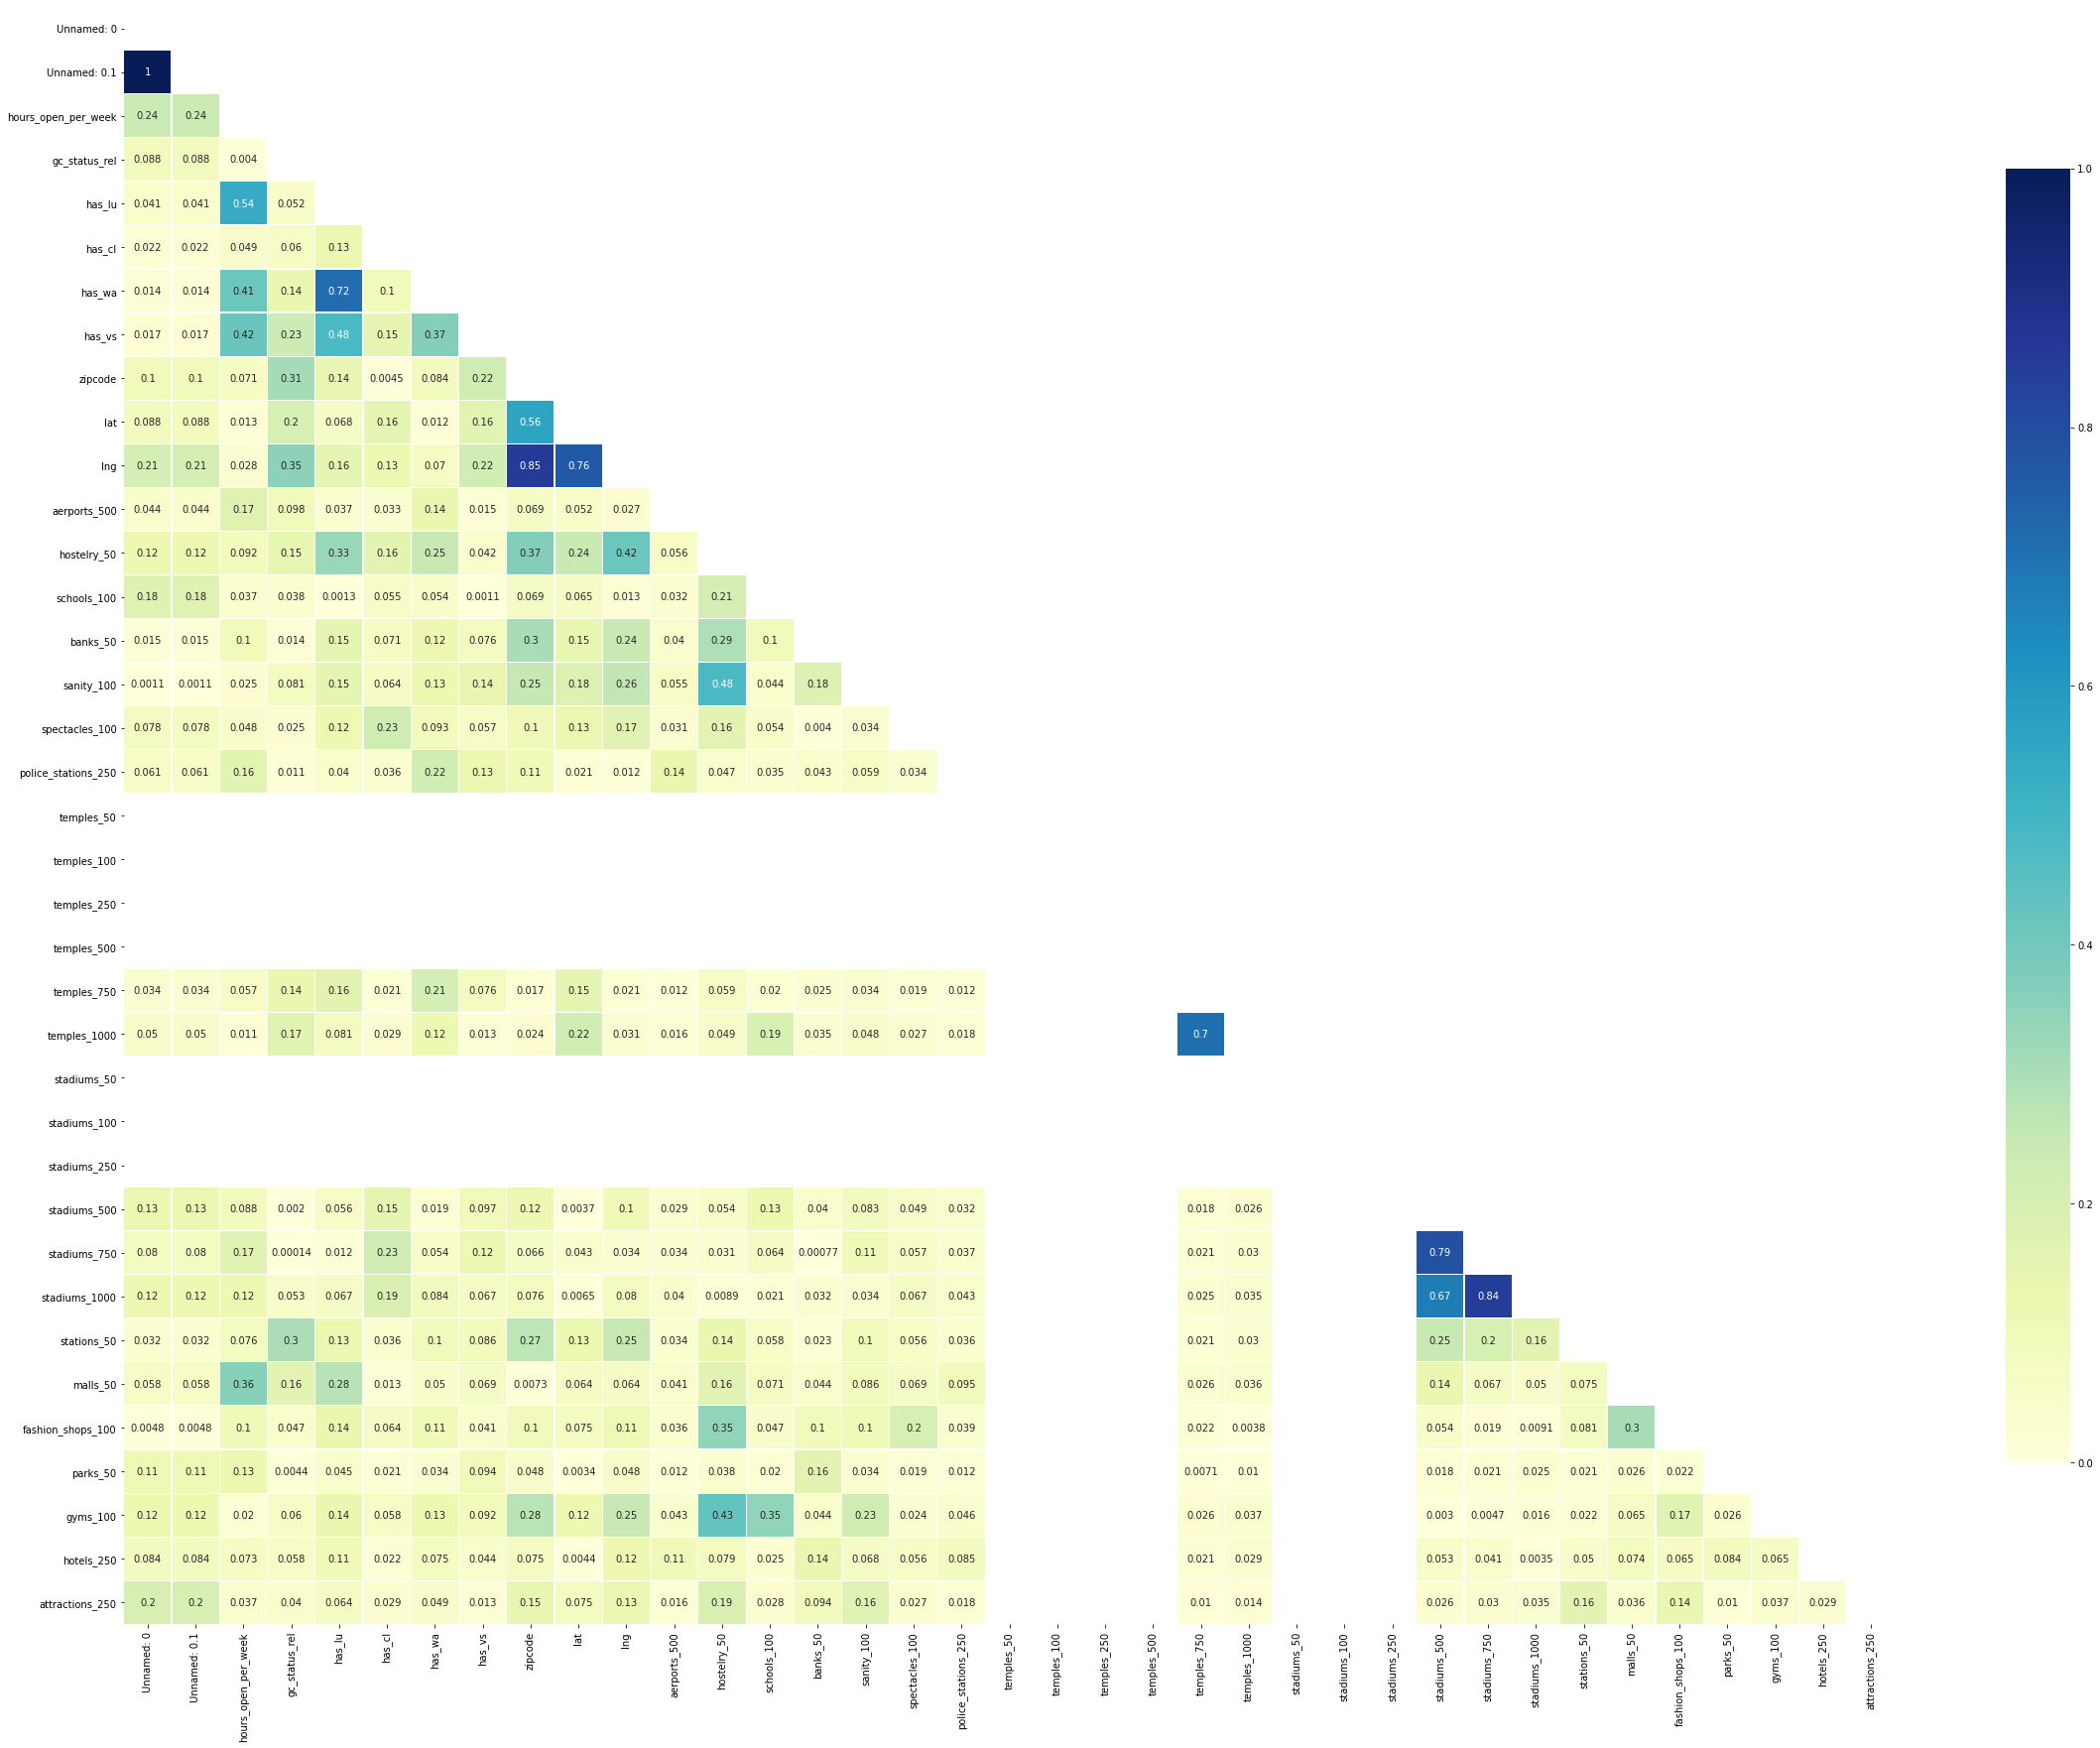

In [10]:
# Compute the correlation matrix
corr = np.abs(df.drop(['revenue'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}, annot=True)

plt.show()

Quitar unnamed 0.1, lat, lng y geometry (dejo zipcode como unica variable para representar la localizacion), temples 750 y 1000, stadiums 500, 750 y 1000

In [11]:
df.drop(['Unnamed: 0.1','lat','lng','geometry','temples_750','temples_1000','stadiums_500','stadiums_750','stadiums_1000'], axis=1, inplace=True)

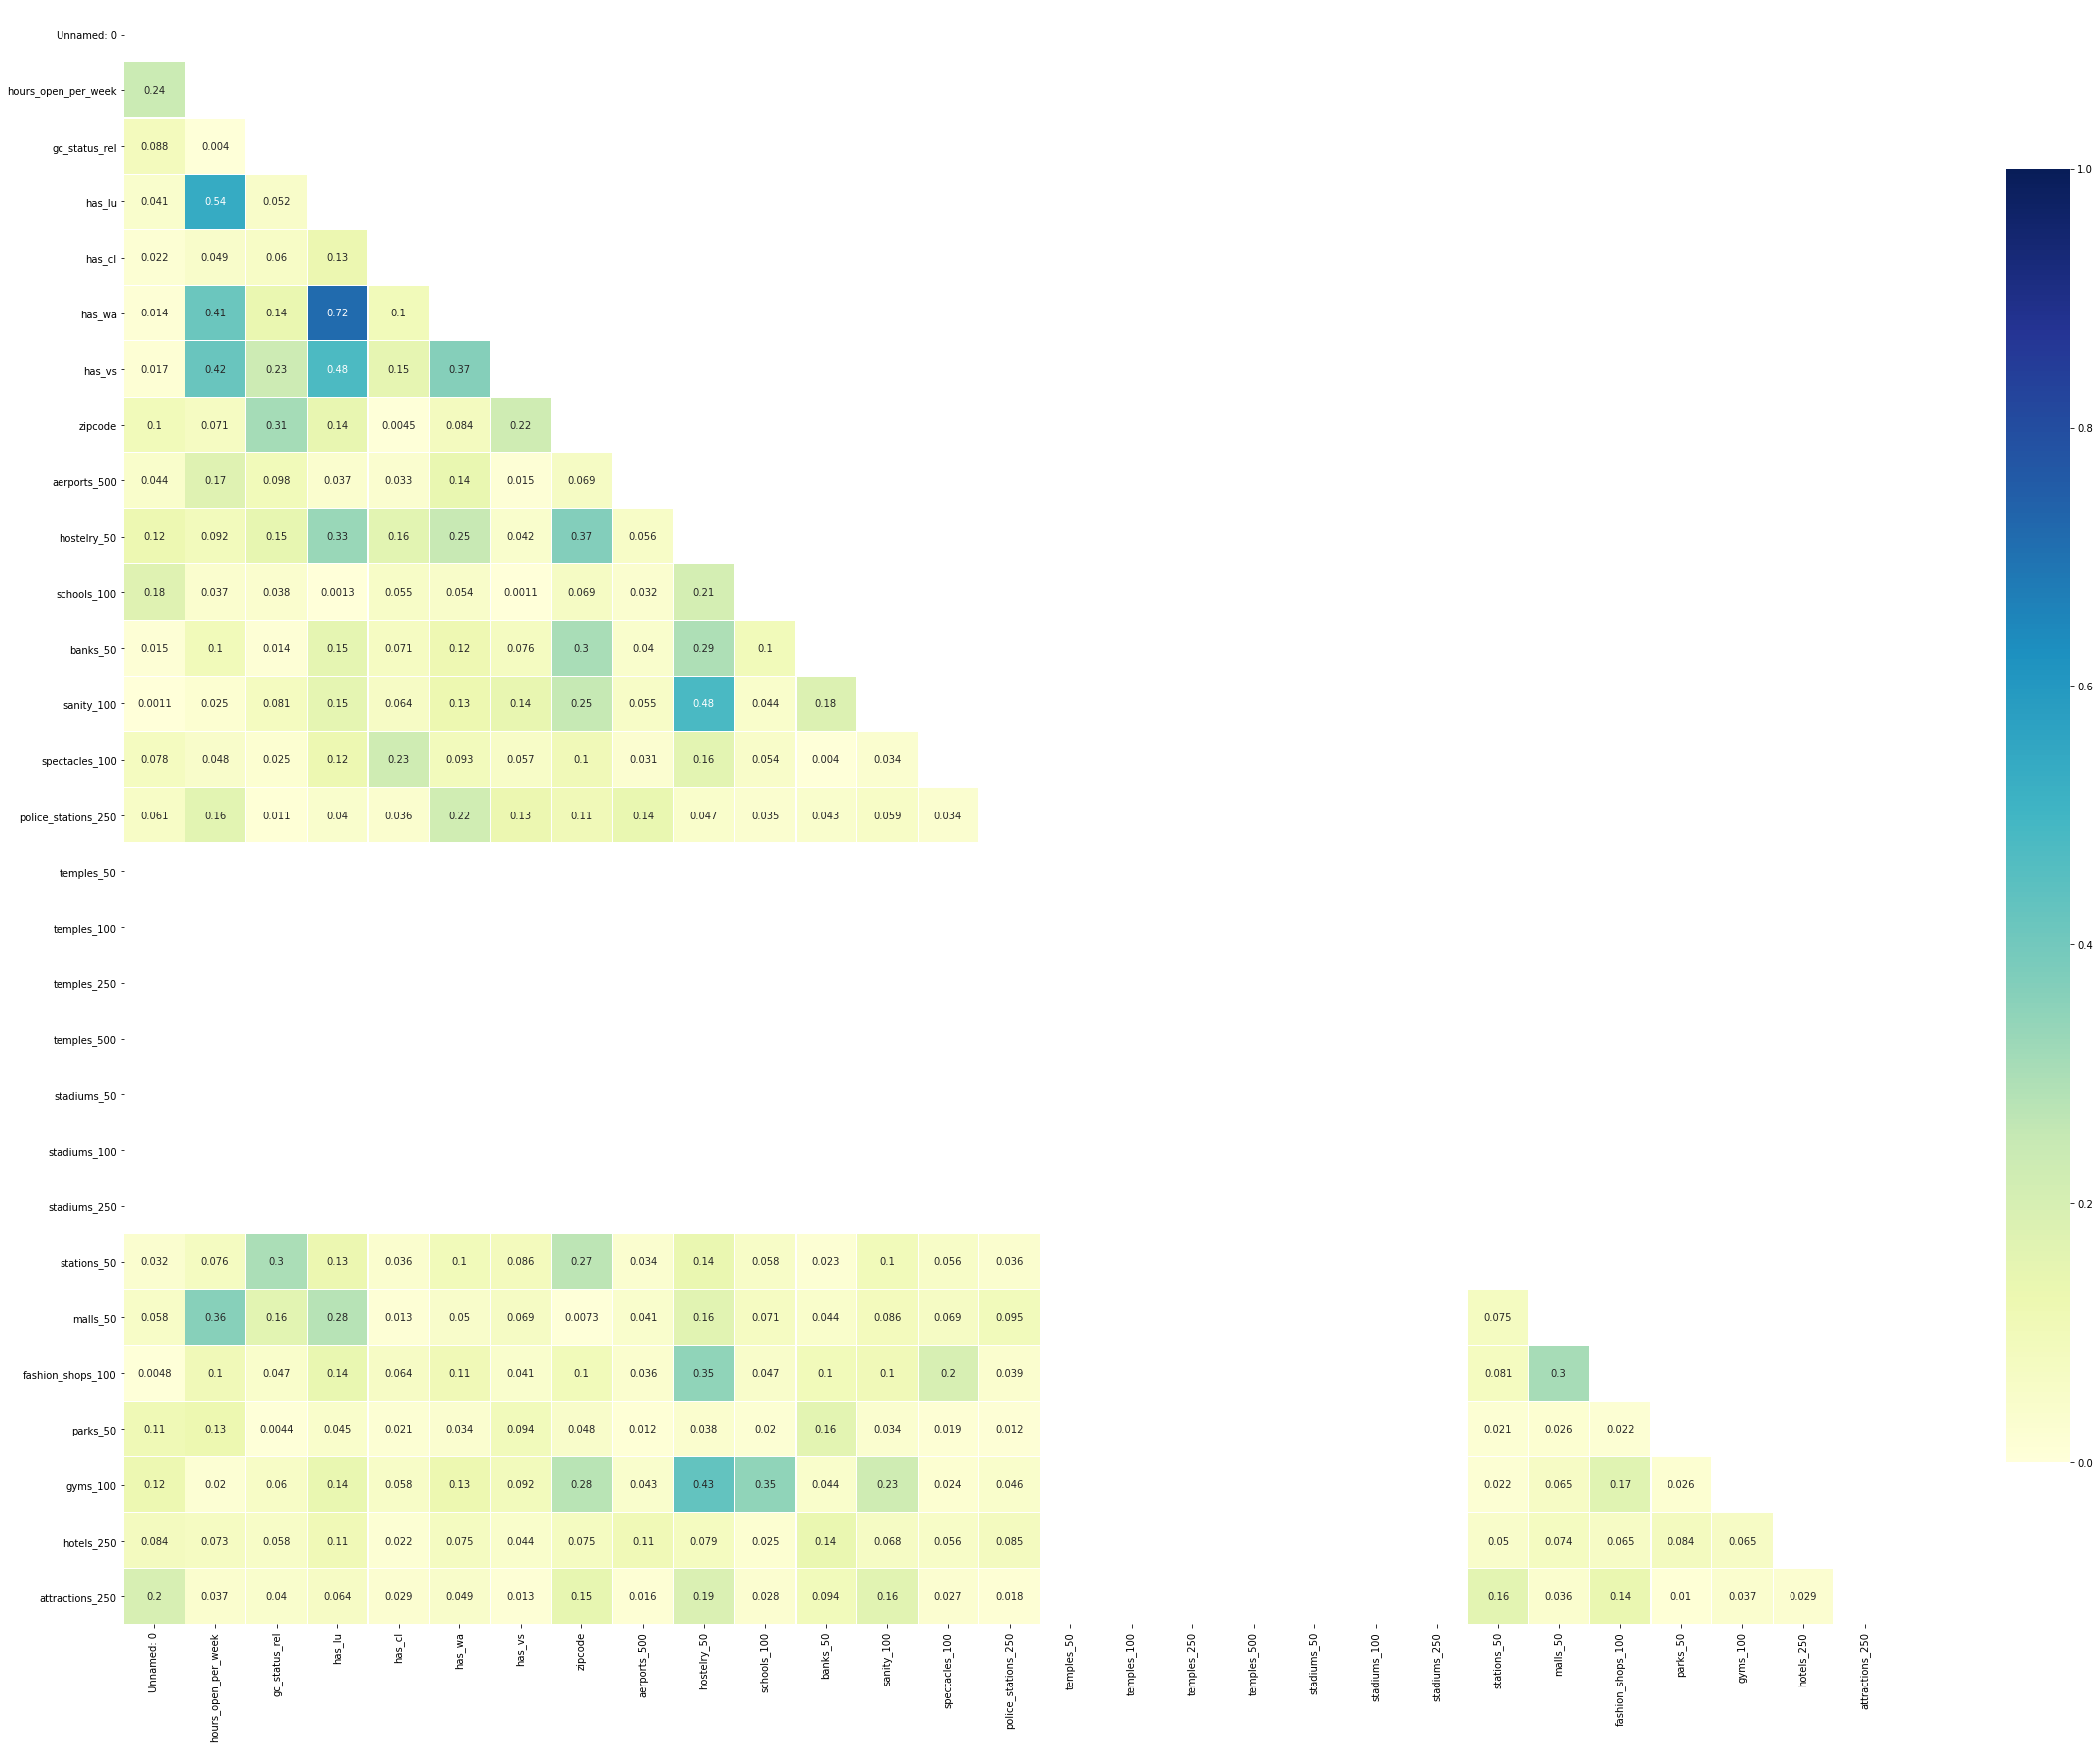

In [12]:
# Compute the correlation matrix
corr = np.abs(df.drop(['revenue'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}, annot=True)

plt.show()

In [13]:
df.drop(['has_lu'], axis=1, inplace=True)

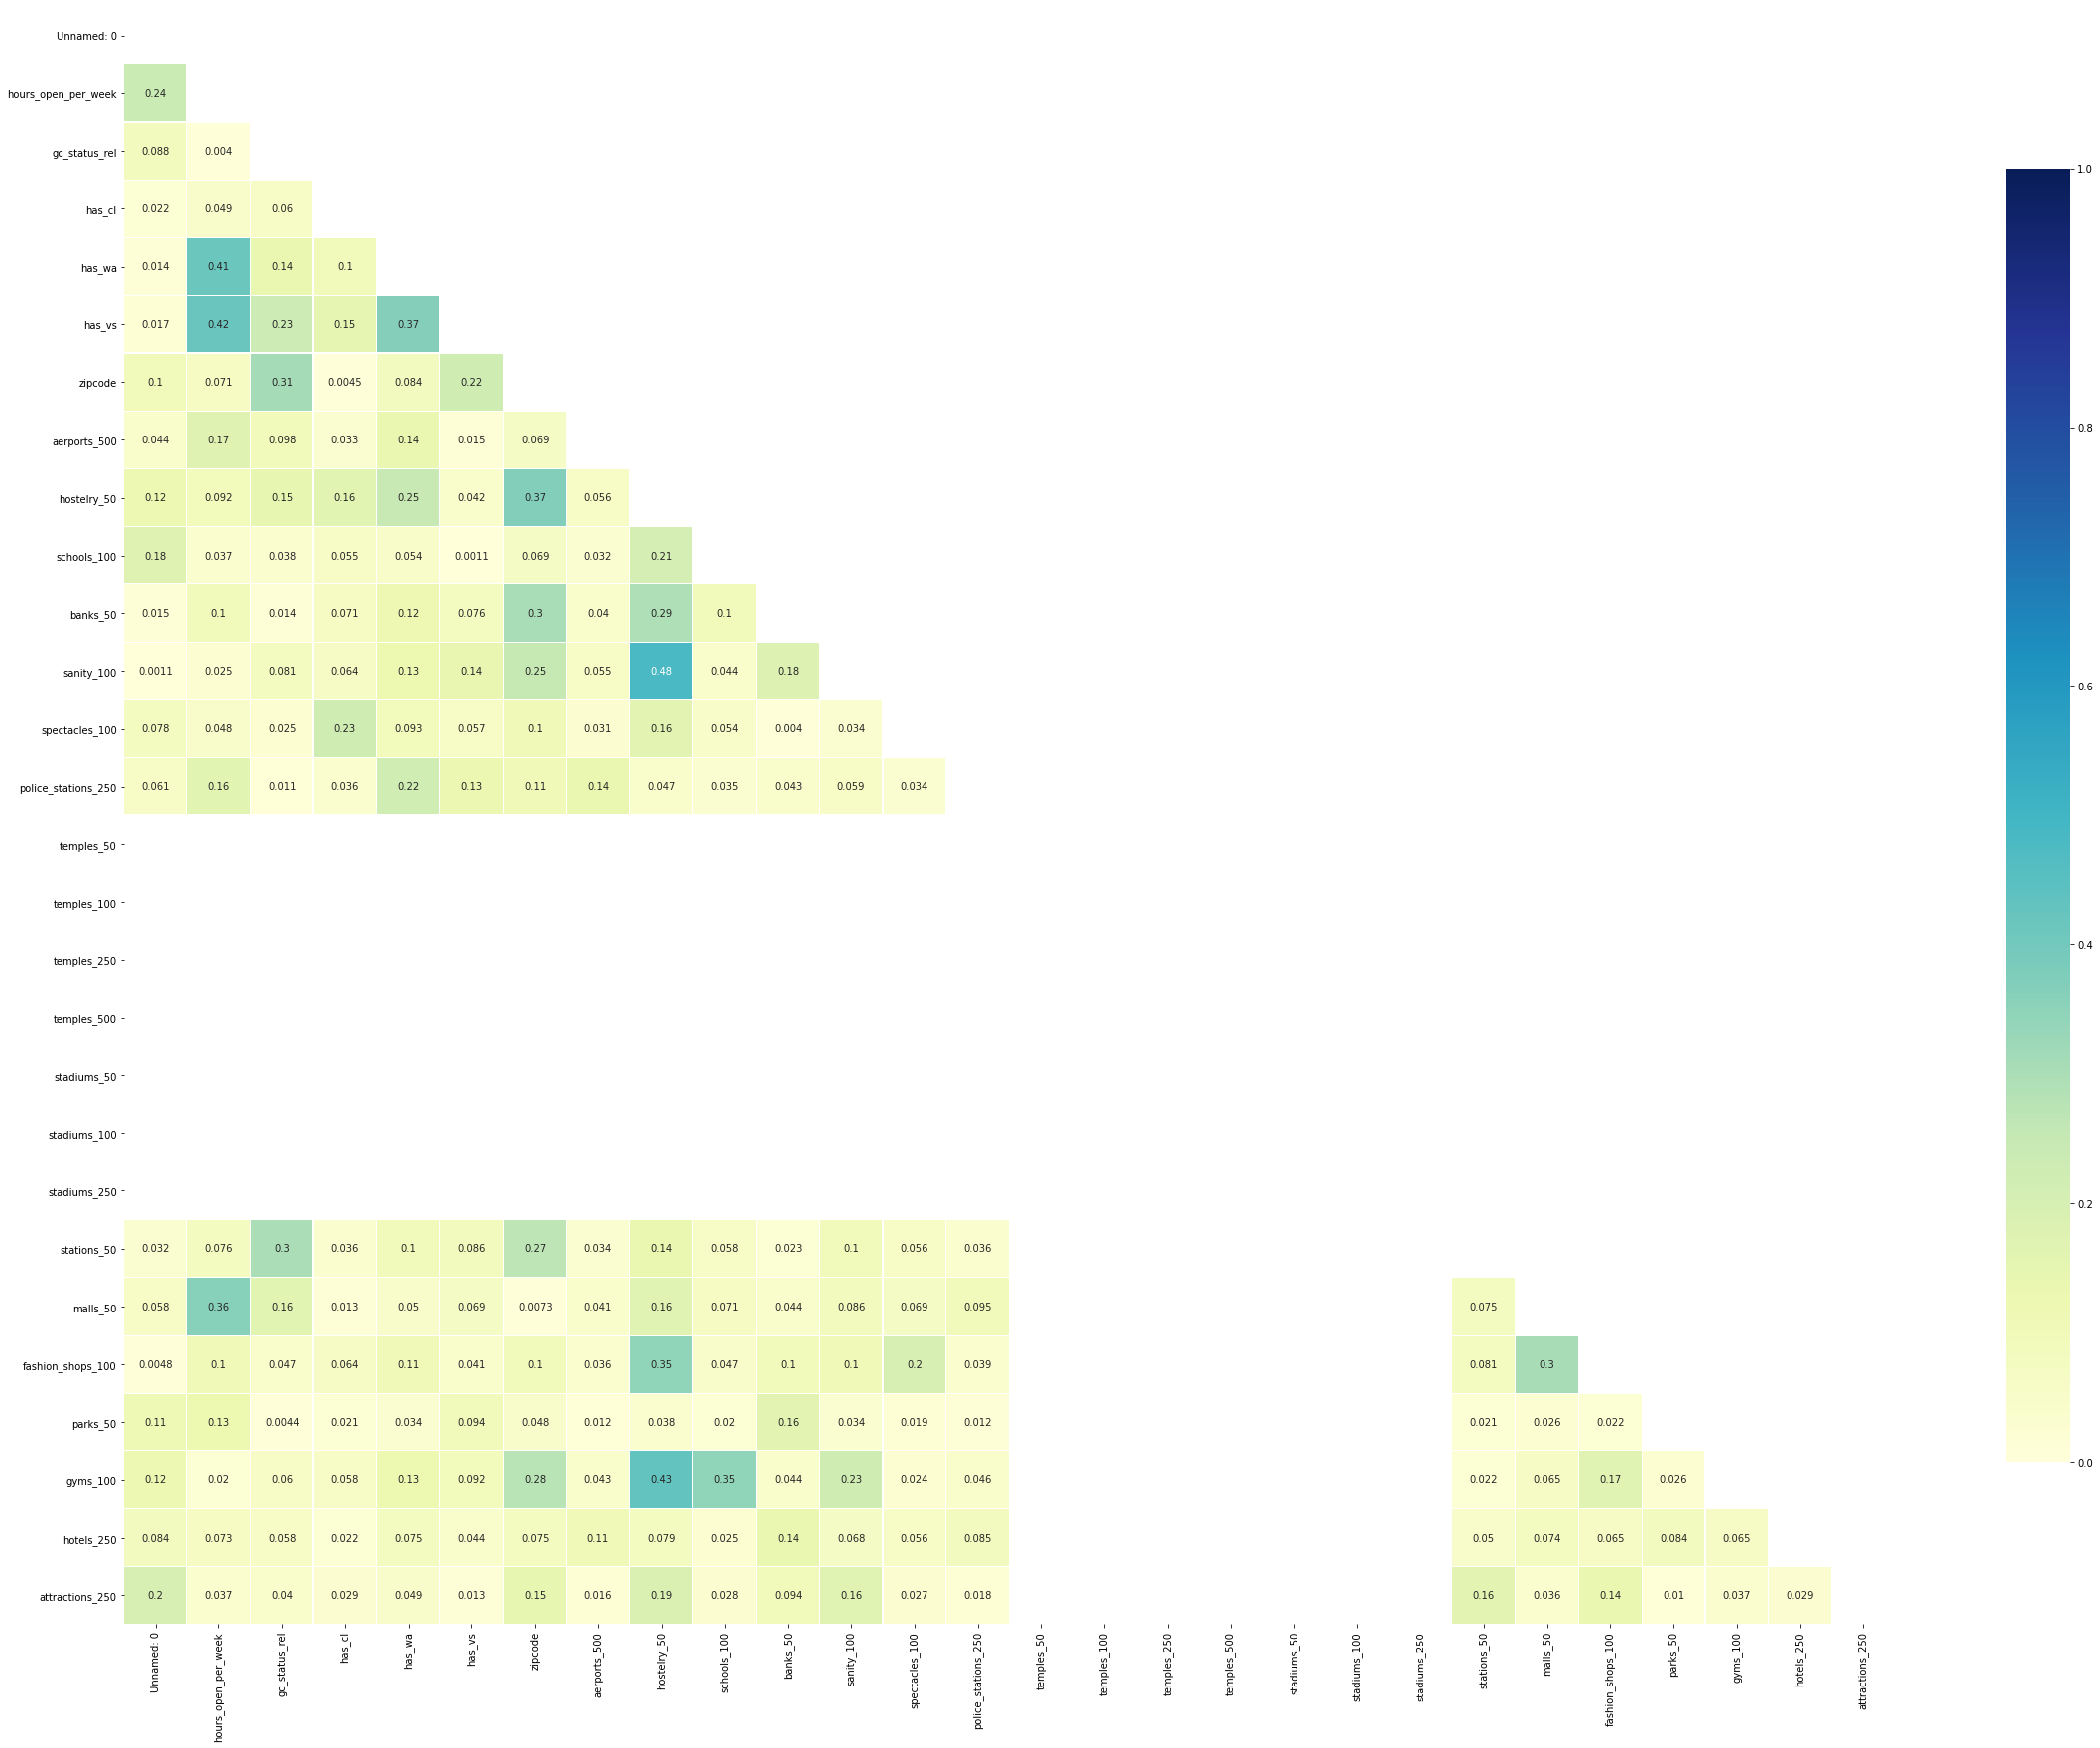

In [14]:
# Compute the correlation matrix
corr = np.abs(df.drop(['revenue'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}, annot=True)

plt.show()

In [15]:
df.head().T

0            1            2             3  \
Unnamed: 0                    160           92           94           173   
hours_open_per_week           104          109        117.5            96   
gc_status_rel                0.94         0.95         0.95          0.94   
has_cl                          0            0            0             0   
has_wa                          1            1            1             1   
has_vs                          0            1            1             0   
zipcode                     11215        11791        11797         11201   
storenumber          48170-261809   7728-62680  7220-158624  24401-237441   
revenue                    795803  3.55133e+06  1.02038e+06        474078   
aerports_500                    0            0            0             0   
hostelry_50                     1            2            0             2   
schools_100                     0            0            0             0   
banks_50                        0            0            0             0   
sanity_100                      0            0            0             0   
spectacles_100                  0            0            0             0   
police_stations_250             0            0            0             1   
temples_50                      0            0            0             0   
temples_100                     0            0            0             0   
temples_250                     0            0            0             0   
temples_500                     0            0            0             0   
stadiums_50                     0            0            0             0   
stadiums_100                    0            0            0             0   
stadiums_250                    0            0            0             0   
stations_50                     0            0            0             0   
malls_50                        0            0            0             0   
fashion_shops_100               0            0            0             0   
parks_50                        0            0            0             0   
gyms_100                        0            0            0             0   
hotels_250                      0            0            7             2   
attractions_250                 0            0            0             0   

                              4  
Unnamed: 0                   24  
hours_open_per_week         113  
gc_status_rel              0.92  
has_cl                        0  
has_wa                        1  
has_vs                        0  
zipcode                   11377  
storenumber          7910-87753  
revenue                  626908  
aerports_500                  0  
hostelry_50                   1  
schools_100                   0  
banks_50                      0  
sanity_100                    0  
spectacles_100                0  
police_stations_250           0  
temples_50                    0  
temples_100                   0  
temples_250                   0  
temples_500                   0  
stadiums_50                   0  
stadiums_100                  0  
stadiums_250                  0  
stations_50                   0  
malls_50                      0  
fashion_shops_100             0  
parks_50                      0  
gyms_100                      0  
hotels_250                    0  
attractions_250               0

## Outliers


In [16]:
df.describe().T

count          mean            std            min  \
Unnamed: 0           141.0  8.970213e+01      51.556729       0.000000   
hours_open_per_week  141.0  1.067234e+02      12.967187      70.000000   
gc_status_rel        141.0  9.486525e-01       0.025973       0.810000   
has_cl               141.0  5.673759e-02       0.232165       0.000000   
has_wa               141.0  8.581560e-01       0.350134       0.000000   
has_vs               141.0  4.468085e-01       0.498935       0.000000   
zipcode              141.0  1.151034e+04     256.770543   11003.000000   
revenue              141.0  1.421275e+06  879649.181458  202733.998892   
aerports_500         141.0  4.255319e-02       0.313331       0.000000   
hostelry_50          141.0  1.219858e+00       1.756995       0.000000   
schools_100          141.0  6.382979e-02       0.272888       0.000000   
banks_50             141.0  1.347518e-01       0.466290       0.000000   
sanity_100           141.0  2.269504e-01       0.565291       0.000000   
spectacles_100       141.0  4.964539e-02       0.217986       0.000000   
police_stations_250  141.0  2.127660e-02       0.144819       0.000000   
temples_50           141.0  0.000000e+00       0.000000       0.000000   
temples_100          141.0  0.000000e+00       0.000000       0.000000   
temples_250          141.0  0.000000e+00       0.000000       0.000000   
temples_500          141.0  0.000000e+00       0.000000       0.000000   
stadiums_50          141.0  0.000000e+00       0.000000       0.000000   
stadiums_100         141.0  0.000000e+00       0.000000       0.000000   
stadiums_250         141.0  0.000000e+00       0.000000       0.000000   
stations_50          141.0  7.801418e-02       0.317826       0.000000   
malls_50             141.0  1.063830e-01       0.352585       0.000000   
fashion_shops_100    141.0  5.673759e-01       2.159051       0.000000   
parks_50             141.0  7.092199e-03       0.084215       0.000000   
gyms_100             141.0  2.127660e-01       0.684612       0.000000   
hotels_250           141.0  1.985816e-01       0.812578       0.000000   
attractions_250      141.0  1.418440e-02       0.118672       0.000000   

                              25%           50%           75%           max  
Unnamed: 0               43.00000  9.100000e+01  1.350000e+02  1.760000e+02  
hours_open_per_week      98.00000  1.085000e+02  1.155000e+02  1.330000e+02  
gc_status_rel             0.94000  9.500000e-01  9.700000e-01  9.900000e-01  
has_cl                    0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
has_wa                    1.00000  1.000000e+00  1.000000e+00  1.000000e+00  
has_vs                    0.00000  0.000000e+00  1.000000e+00  1.000000e+00  
zipcode               11229.00000  1.155000e+04  1.174600e+04  1.195200e+04  
revenue              695347.79325  1.192408e+06  2.059461e+06  3.855217e+06  
aerports_500              0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
hostelry_50               0.00000  1.000000e+00  2.000000e+00  8.000000e+00  
schools_100               0.00000  0.000000e+00  0.000000e+00  2.000000e+00  
banks_50                  0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
sanity_100                0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
spectacles_100            0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
police_stations_250       0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
temples_50                0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
temples_100               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
temples_250               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
temples_500               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
stadiums_50               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
stadiums_100              0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
stadiums_250              0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
statio

In [17]:
df['revenue'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('revenue')

plt.show()

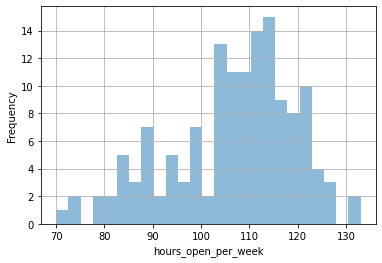

In [18]:
df['hours_open_per_week'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('hours_open_per_week')

plt.show()

Revenue de mas de 3 podria ser Outliers? entre 70 y 100h por semana abierto podria ser outliers?

In [19]:
df.dtypes

Unnamed: 0               int64
hours_open_per_week    float64
gc_status_rel          float64
has_cl                   int64
has_wa                   int64
has_vs                   int64
zipcode                  int64
storenumber             object
revenue                float64
aerports_500             int64
hostelry_50              int64
schools_100              int64
banks_50                 int64
sanity_100               int64
spectacles_100           int64
police_stations_250      int64
temples_50               int64
temples_100              int64
temples_250              int64
temples_500              int64
stadiums_50              int64
stadiums_100             int64
stadiums_250             int64
stations_50              int64
malls_50                 int64
fashion_shops_100        int64
parks_50                 int64
gyms_100                 int64
hotels_250               int64
attractions_250          int64
dtype: object

In [20]:
#Elimino storenumber que es de tipo object.
df.drop(['storenumber'], axis=1, inplace=True)

In [21]:
df.head().T

0             1             2             3  \
Unnamed: 0              160.000000  9.200000e+01  9.400000e+01     173.00000   
hours_open_per_week     104.000000  1.090000e+02  1.175000e+02      96.00000   
gc_status_rel             0.940000  9.500000e-01  9.500000e-01       0.94000   
has_cl                    0.000000  0.000000e+00  0.000000e+00       0.00000   
has_wa                    1.000000  1.000000e+00  1.000000e+00       1.00000   
has_vs                    0.000000  1.000000e+00  1.000000e+00       0.00000   
zipcode               11215.000000  1.179100e+04  1.179700e+04   11201.00000   
revenue              795803.191957  3.551330e+06  1.020381e+06  474077.63422   
aerports_500              0.000000  0.000000e+00  0.000000e+00       0.00000   
hostelry_50               1.000000  2.000000e+00  0.000000e+00       2.00000   
schools_100               0.000000  0.000000e+00  0.000000e+00       0.00000   
banks_50                  0.000000  0.000000e+00  0.000000e+00       0.00000   
sanity_100                0.000000  0.000000e+00  0.000000e+00       0.00000   
spectacles_100            0.000000  0.000000e+00  0.000000e+00       0.00000   
police_stations_250       0.000000  0.000000e+00  0.000000e+00       1.00000   
temples_50                0.000000  0.000000e+00  0.000000e+00       0.00000   
temples_100               0.000000  0.000000e+00  0.000000e+00       0.00000   
temples_250               0.000000  0.000000e+00  0.000000e+00       0.00000   
temples_500               0.000000  0.000000e+00  0.000000e+00       0.00000   
stadiums_50               0.000000  0.000000e+00  0.000000e+00       0.00000   
stadiums_100              0.000000  0.000000e+00  0.000000e+00       0.00000   
stadiums_250              0.000000  0.000000e+00  0.000000e+00       0.00000   
stations_50               0.000000  0.000000e+00  0.000000e+00       0.00000   
malls_50                  0.000000  0.000000e+00  0.000000e+00       0.00000   
fashion_shops_100         0.000000  0.000000e+00  0.000000e+00       0.00000   
parks_50                  0.000000  0.000000e+00  0.000000e+00       0.00000   
gyms_100                  0.000000  0.000000e+00  0.000000e+00       0.00000   
hotels_250                0.000000  0.000000e+00  7.000000e+00       2.00000   
attractions_250           0.000000  0.000000e+00  0.000000e+00       0.00000   

                                 4  
Unnamed: 0               24.000000  
hours_open_per_week     113.000000  
gc_status_rel             0.920000  
has_cl                    0.000000  
has_wa                    1.000000  
has_vs                    0.000000  
zipcode               11377.000000  
revenue              626907.578025  
aerports_500              0.000000  
hostelry_50               1.000000  
schools_100               0.000000  
banks_50                  0.000000  
sanity_100                0.000000  
spectacles_100            0.000000  
police_stations_250       0.000000  
temples_50                0.000000  
temples_100               0.000000  
temples_250               0.000000  
temples_500               0.000000  
stadiums_50               0.000000  
stadiums_100              0.000000  
stadiums_250              0.000000  
stations_50               0.000000  
malls_50                  0.000000  
fashion_shops_100         0.000000  
parks_50                  0.000000  
gyms_100                  0.000000  
hotels_250                0.000000  
attractions_250           0.000000

In [22]:
df.describe().T

count          mean            std            min  \
Unnamed: 0           141.0  8.970213e+01      51.556729       0.000000   
hours_open_per_week  141.0  1.067234e+02      12.967187      70.000000   
gc_status_rel        141.0  9.486525e-01       0.025973       0.810000   
has_cl               141.0  5.673759e-02       0.232165       0.000000   
has_wa               141.0  8.581560e-01       0.350134       0.000000   
has_vs               141.0  4.468085e-01       0.498935       0.000000   
zipcode              141.0  1.151034e+04     256.770543   11003.000000   
revenue              141.0  1.421275e+06  879649.181458  202733.998892   
aerports_500         141.0  4.255319e-02       0.313331       0.000000   
hostelry_50          141.0  1.219858e+00       1.756995       0.000000   
schools_100          141.0  6.382979e-02       0.272888       0.000000   
banks_50             141.0  1.347518e-01       0.466290       0.000000   
sanity_100           141.0  2.269504e-01       0.565291       0.000000   
spectacles_100       141.0  4.964539e-02       0.217986       0.000000   
police_stations_250  141.0  2.127660e-02       0.144819       0.000000   
temples_50           141.0  0.000000e+00       0.000000       0.000000   
temples_100          141.0  0.000000e+00       0.000000       0.000000   
temples_250          141.0  0.000000e+00       0.000000       0.000000   
temples_500          141.0  0.000000e+00       0.000000       0.000000   
stadiums_50          141.0  0.000000e+00       0.000000       0.000000   
stadiums_100         141.0  0.000000e+00       0.000000       0.000000   
stadiums_250         141.0  0.000000e+00       0.000000       0.000000   
stations_50          141.0  7.801418e-02       0.317826       0.000000   
malls_50             141.0  1.063830e-01       0.352585       0.000000   
fashion_shops_100    141.0  5.673759e-01       2.159051       0.000000   
parks_50             141.0  7.092199e-03       0.084215       0.000000   
gyms_100             141.0  2.127660e-01       0.684612       0.000000   
hotels_250           141.0  1.985816e-01       0.812578       0.000000   
attractions_250      141.0  1.418440e-02       0.118672       0.000000   

                              25%           50%           75%           max  
Unnamed: 0               43.00000  9.100000e+01  1.350000e+02  1.760000e+02  
hours_open_per_week      98.00000  1.085000e+02  1.155000e+02  1.330000e+02  
gc_status_rel             0.94000  9.500000e-01  9.700000e-01  9.900000e-01  
has_cl                    0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
has_wa                    1.00000  1.000000e+00  1.000000e+00  1.000000e+00  
has_vs                    0.00000  0.000000e+00  1.000000e+00  1.000000e+00  
zipcode               11229.00000  1.155000e+04  1.174600e+04  1.195200e+04  
revenue              695347.79325  1.192408e+06  2.059461e+06  3.855217e+06  
aerports_500              0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
hostelry_50               0.00000  1.000000e+00  2.000000e+00  8.000000e+00  
schools_100               0.00000  0.000000e+00  0.000000e+00  2.000000e+00  
banks_50                  0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
sanity_100                0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
spectacles_100            0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
police_stations_250       0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
temples_50                0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
temples_100               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
temples_250               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
temples_500               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
stadiums_50               0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
stadiums_100              0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
stadiums_250              0.00000  0.000000e+00  0.000000e+00  0.000000e+00  
statio

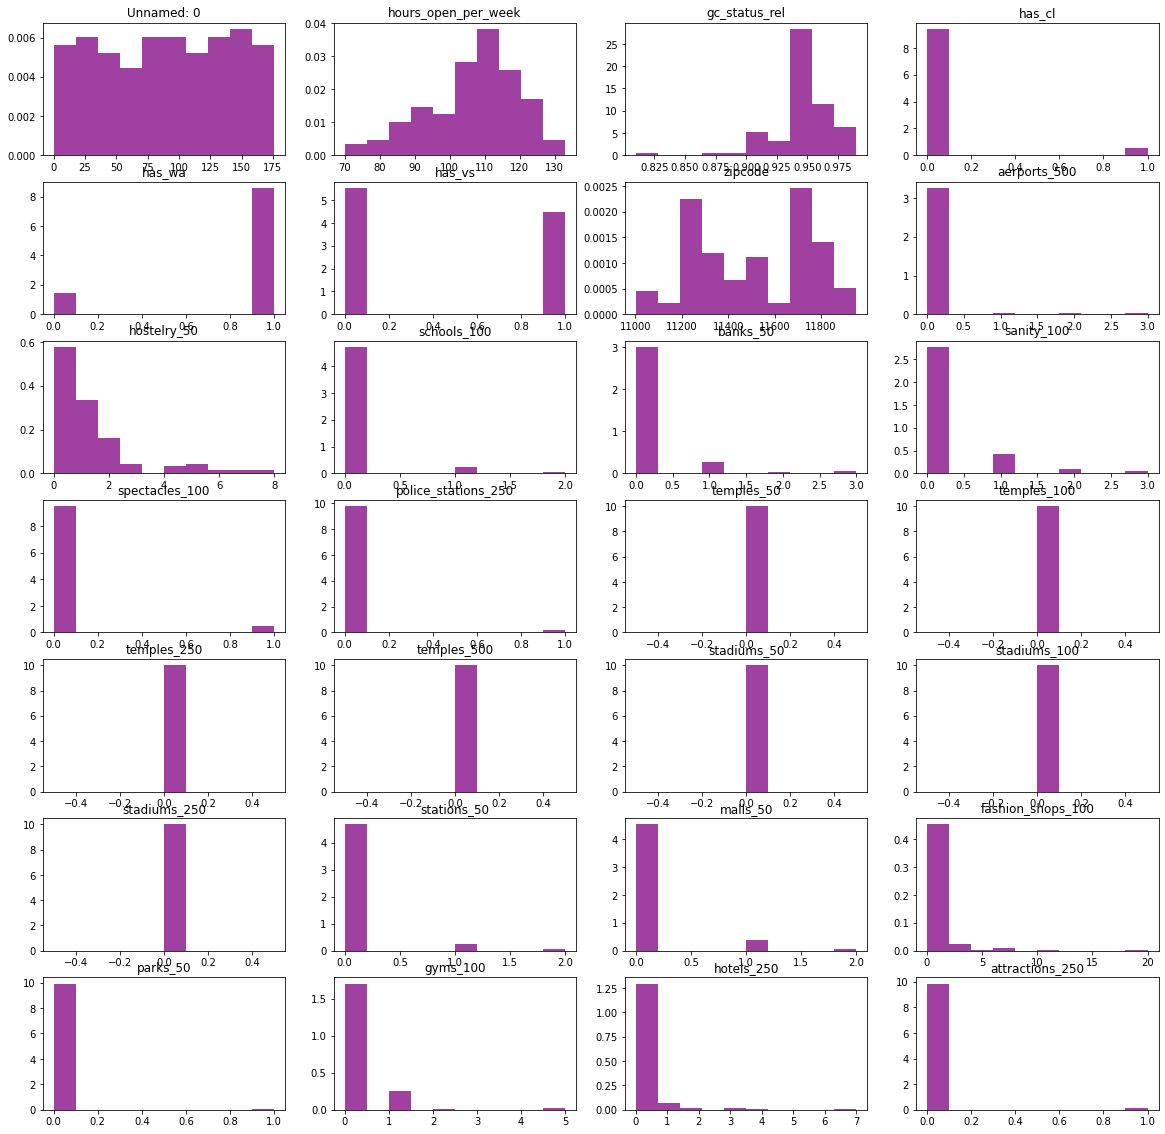

In [31]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(df.columns.drop(['revenue'])):
    plt.subplot(7, 4, i+1)   
    plt.hist(df[feature], density=1, facecolor='purple', alpha=0.75)
    plt.title(feature)

plt.show()

temples_50 temples_100 temples_250 temples_500 tienen todos el mismo valor 0 apariciones
stadiums_50 stadiums_100 stadiums_250 tienen todos el mismo valor 0 aparciones

In [32]:
df.drop(['temples_50','temples_100','temples_250','temples_500'], axis=1, inplace=True)
df.drop(['stadiums_50','stadiums_100','stadiums_250'], axis=1, inplace=True)

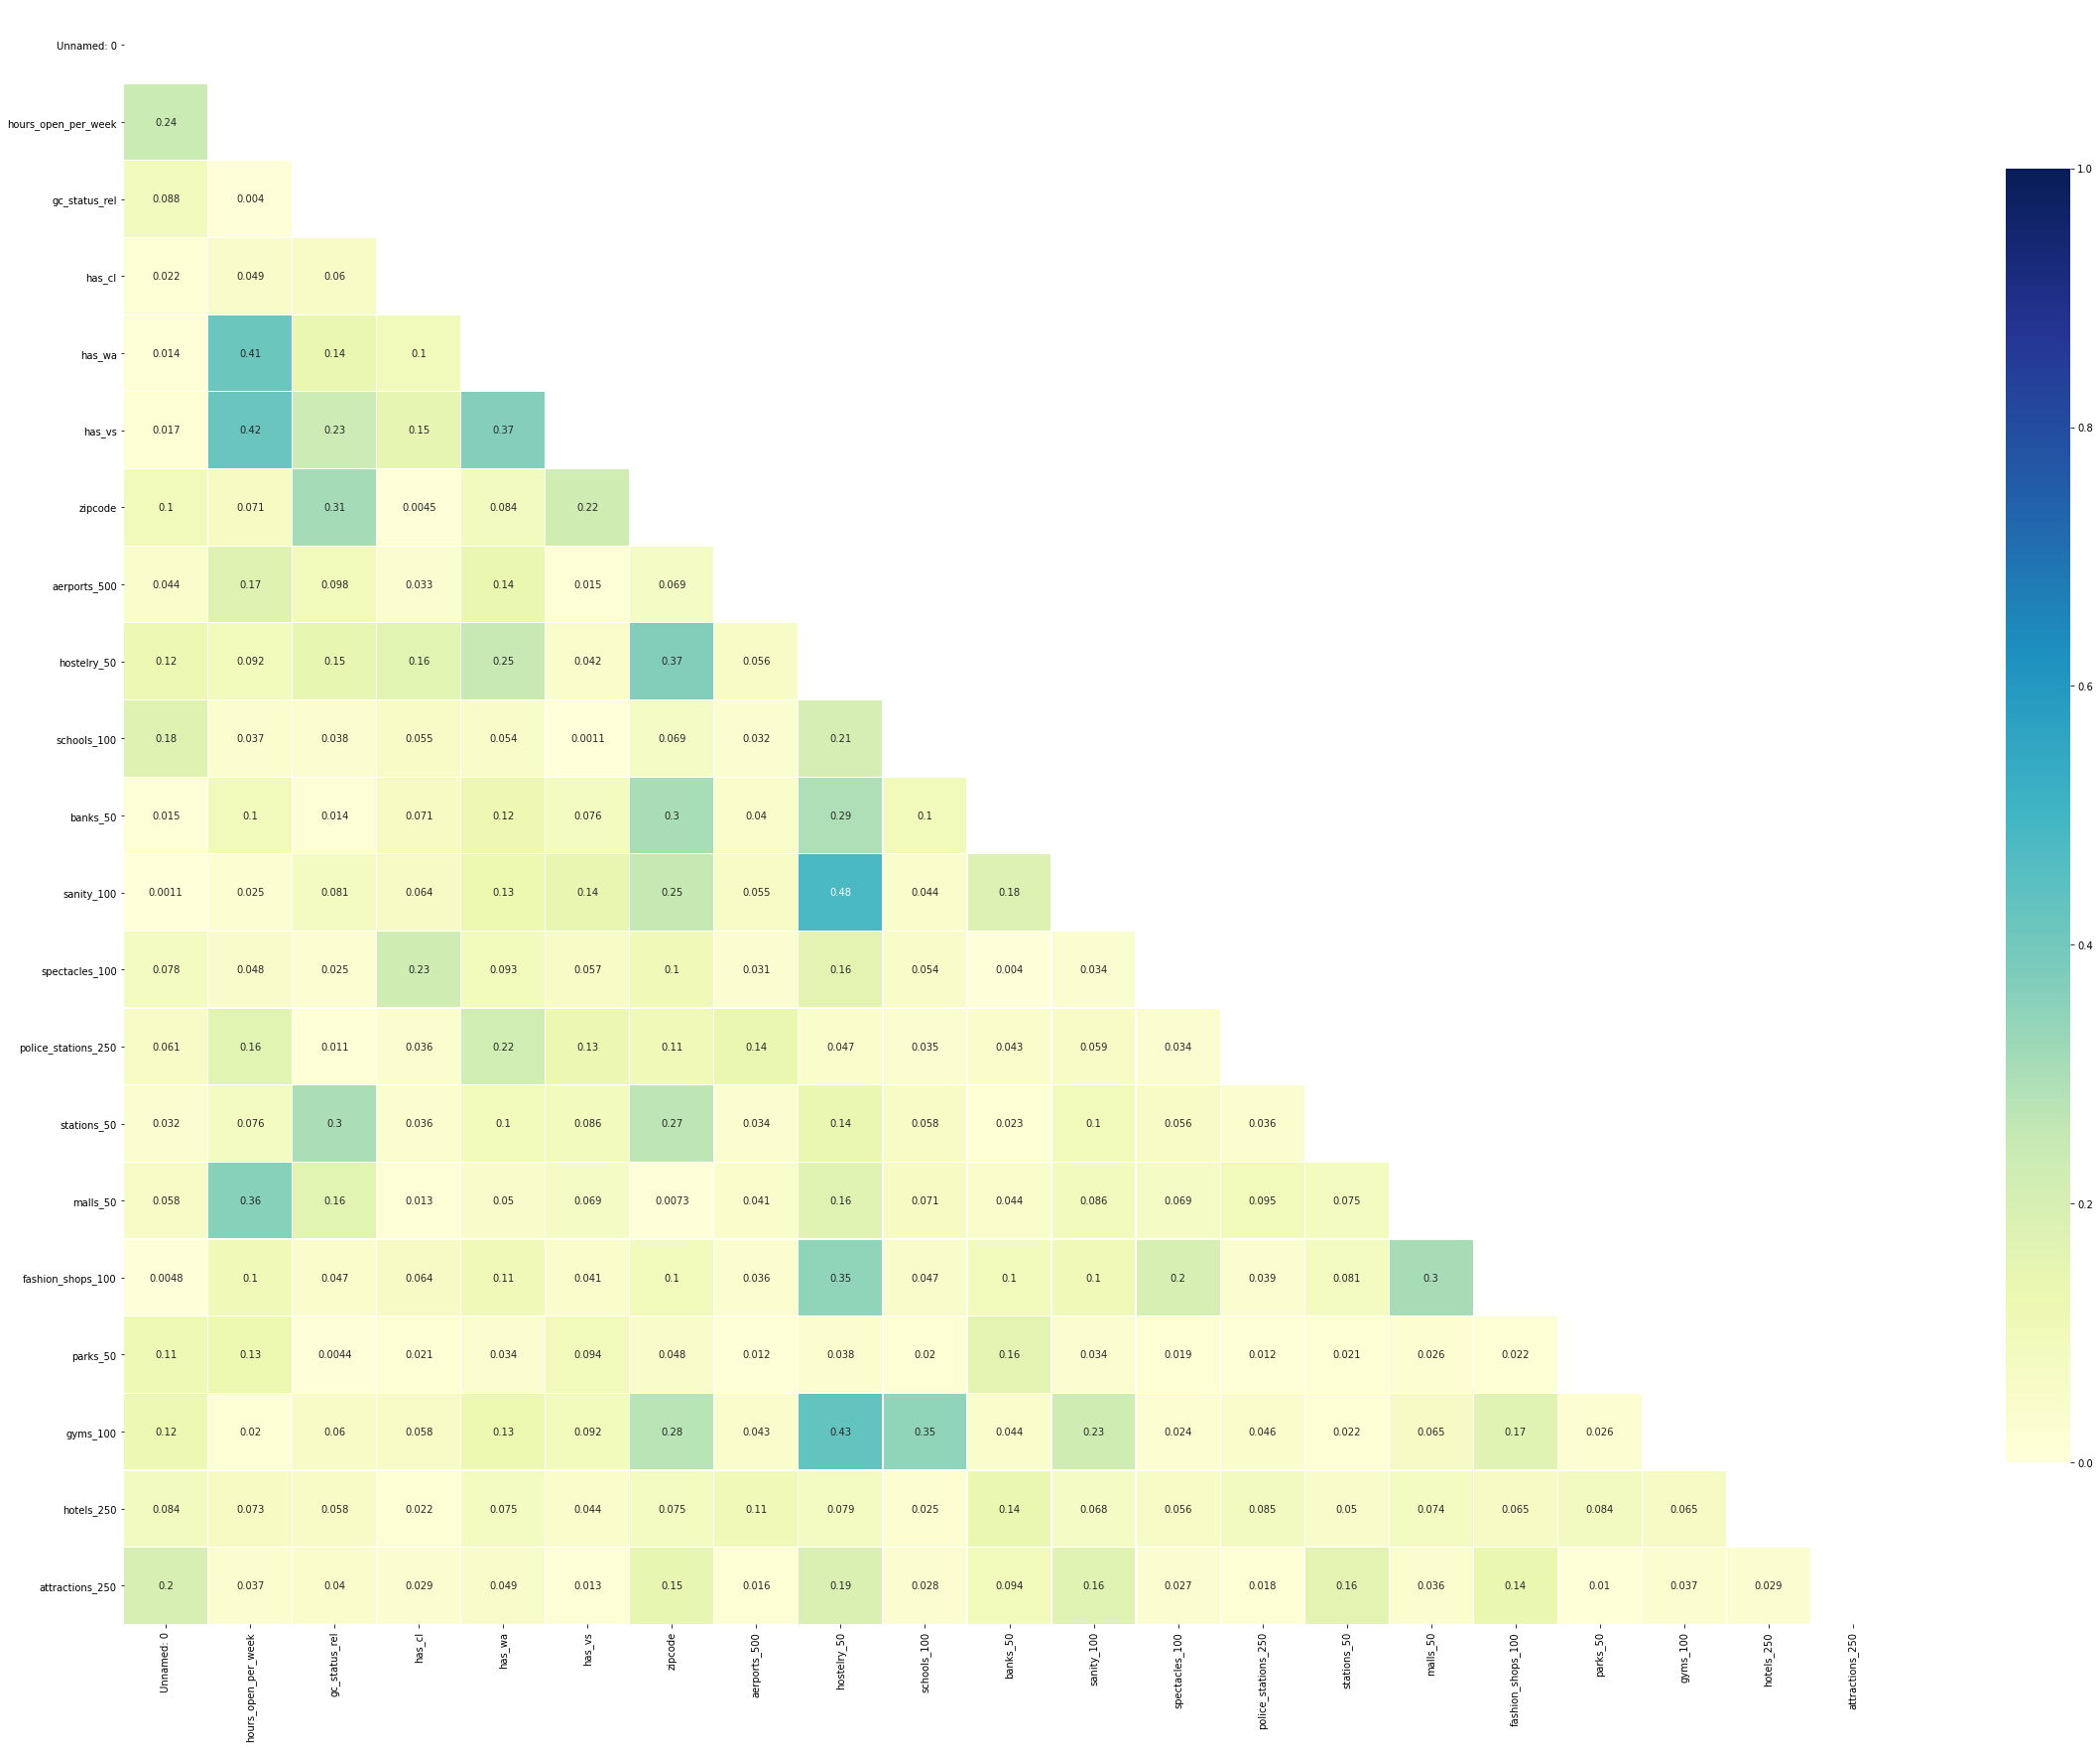

In [34]:
# Compute the correlation matrix
corr = np.abs(df.drop(['revenue'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}, annot=True)

plt.show()

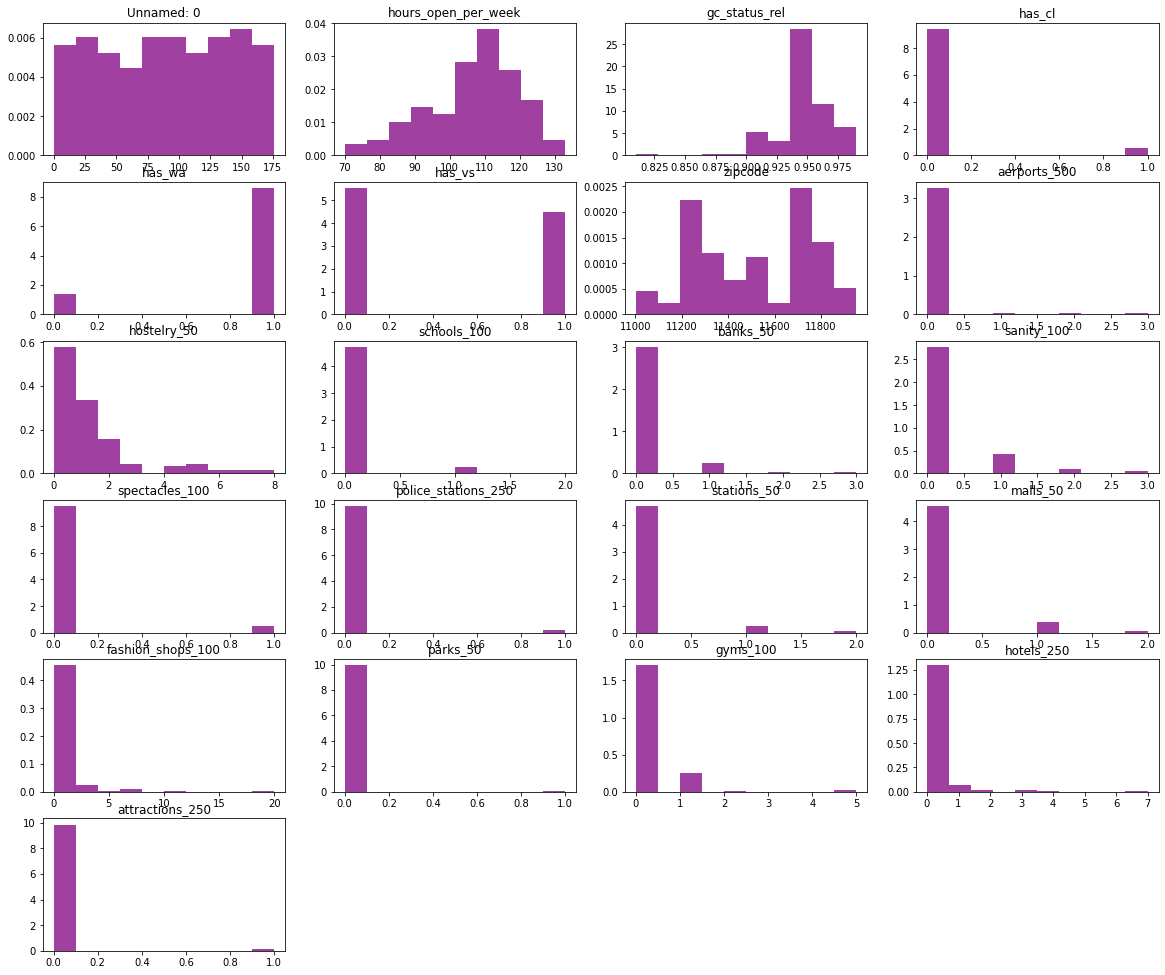

In [33]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(df.columns.drop(['revenue'])):
    plt.subplot(7, 4, i+1)   
    plt.hist(df[feature], density=1, facecolor='purple', alpha=0.75)
    plt.title(feature)

plt.show()

In [35]:
df.head()

Unnamed: 0  hours_open_per_week  gc_status_rel  has_cl  has_wa  has_vs  \
0         160                104.0           0.94       0       1       0   
1          92                109.0           0.95       0       1       1   
2          94                117.5           0.95       0       1       1   
3         173                 96.0           0.94       0       1       0   
4          24                113.0           0.92       0       1       0   

   zipcode       revenue  aerports_500  hostelry_50  schools_100  banks_50  \
0    11215  7.958032e+05             0            1            0         0   
1    11791  3.551330e+06             0            2            0         0   
2    11797  1.020381e+06             0            0            0         0   
3    11201  4.740776e+05             0            2            0         0   
4    11377  6.269076e+05             0            1            0         0   

   sanity_100  spectacles_100  police_stations_250  stations_50  malls_50  \
0           0               0                    0            0         0   
1           0               0                    0            0         0   
2           0               0                    0            0         0   
3           0               0                    1            0         0   
4           0               0                    0            0         0   

   fashion_shops_100  parks_50  gyms_100  hotels_250  attractions_250  
0                  0         0         0           0                0  
1                  0         0         0           0                0  
2                  0         0         0           7                0  
3                  0         0         0           2                0  
4                  0         0         0           0                0

Eliminamos Unnamed:0 ya que no sabemos que hace
Eliminamos Zipcode ya que para lo que vamos a analizar el zipcode no nos interesa

In [39]:
df.drop(['Unnamed: 0', 'zipcode'], axis=1, inplace=True)

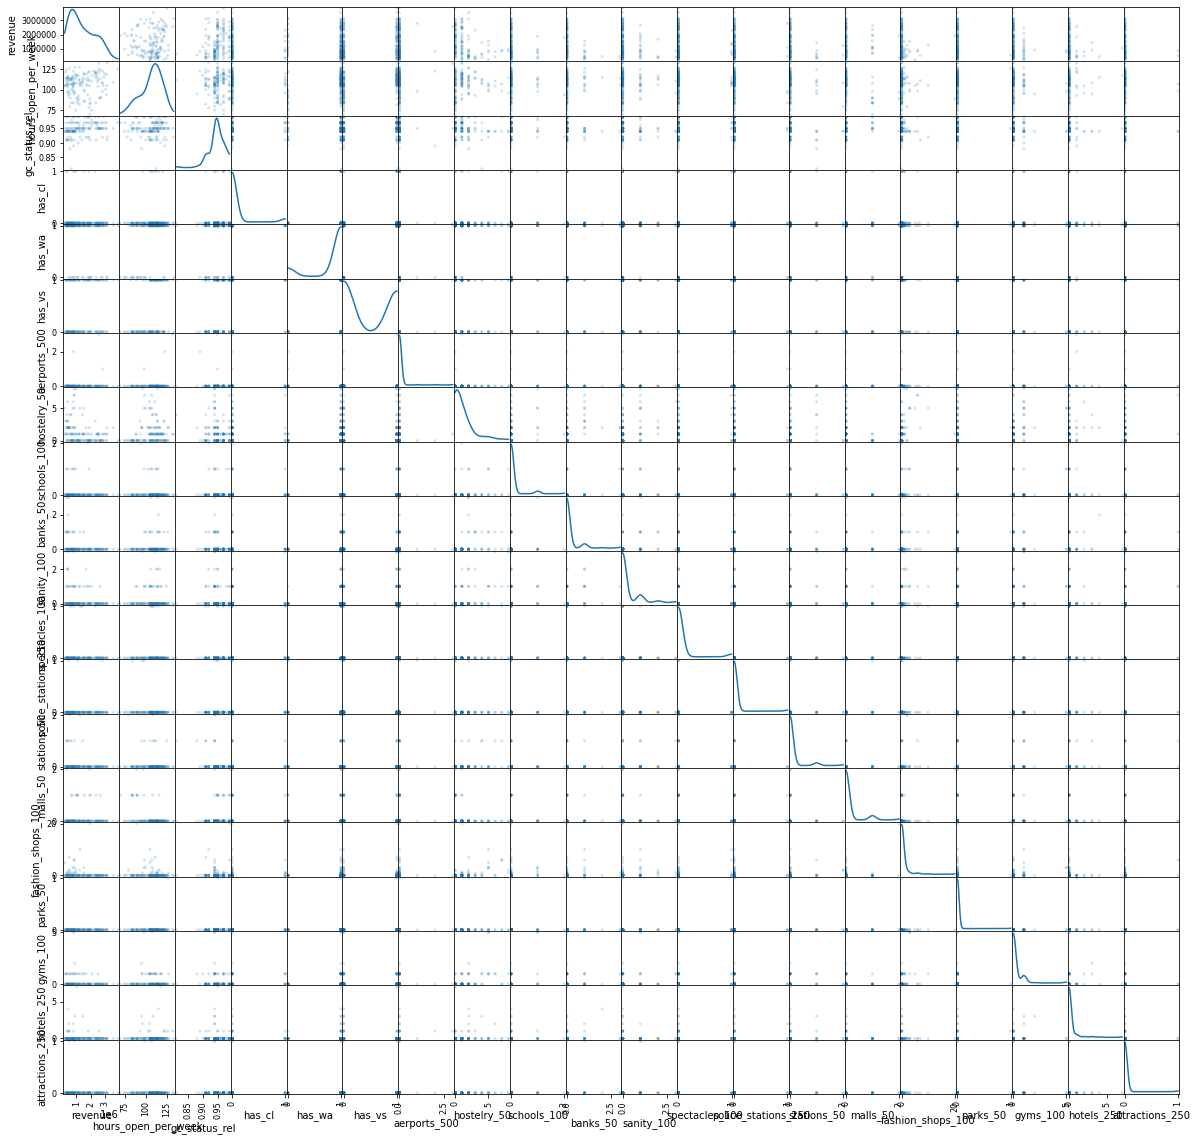

In [47]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

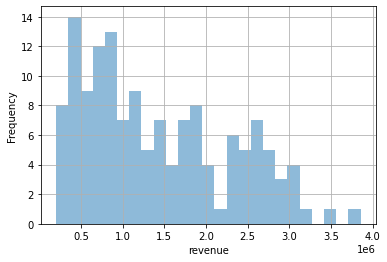

In [48]:
df['revenue'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('revenue')

plt.show()

In [49]:
# Put revenue in the first position
first_column = df.pop('revenue')
df.insert(0,'revenue', first_column)

In [50]:
df.describe().T

count          mean            std            min  \
revenue              141.0  1.421275e+06  879649.181458  202733.998892   
hours_open_per_week  141.0  1.067234e+02      12.967187      70.000000   
gc_status_rel        141.0  9.486525e-01       0.025973       0.810000   
has_cl               141.0  5.673759e-02       0.232165       0.000000   
has_wa               141.0  8.581560e-01       0.350134       0.000000   
has_vs               141.0  4.468085e-01       0.498935       0.000000   
aerports_500         141.0  4.255319e-02       0.313331       0.000000   
hostelry_50          141.0  1.219858e+00       1.756995       0.000000   
schools_100          141.0  6.382979e-02       0.272888       0.000000   
banks_50             141.0  1.347518e-01       0.466290       0.000000   
sanity_100           141.0  2.269504e-01       0.565291       0.000000   
spectacles_100       141.0  4.964539e-02       0.217986       0.000000   
police_stations_250  141.0  2.127660e-02       0.144819       0.000000   
stations_50          141.0  7.801418e-02       0.317826       0.000000   
malls_50             141.0  1.063830e-01       0.352585       0.000000   
fashion_shops_100    141.0  5.673759e-01       2.159051       0.000000   
parks_50             141.0  7.092199e-03       0.084215       0.000000   
gyms_100             141.0  2.127660e-01       0.684612       0.000000   
hotels_250           141.0  1.985816e-01       0.812578       0.000000   
attractions_250      141.0  1.418440e-02       0.118672       0.000000   

                              25%           50%           75%           max  
revenue              695347.79325  1.192408e+06  2.059461e+06  3.855217e+06  
hours_open_per_week      98.00000  1.085000e+02  1.155000e+02  1.330000e+02  
gc_status_rel             0.94000  9.500000e-01  9.700000e-01  9.900000e-01  
has_cl                    0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
has_wa                    1.00000  1.000000e+00  1.000000e+00  1.000000e+00  
has_vs                    0.00000  0.000000e+00  1.000000e+00  1.000000e+00  
aerports_500              0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
hostelry_50               0.00000  1.000000e+00  2.000000e+00  8.000000e+00  
schools_100               0.00000  0.000000e+00  0.000000e+00  2.000000e+00  
banks_50                  0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
sanity_100                0.00000  0.000000e+00  0.000000e+00  3.000000e+00  
spectacles_100            0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
police_stations_250       0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
stations_50               0.00000  0.000000e+00  0.000000e+00  2.000000e+00  
malls_50                  0.00000  0.000000e+00  0.000000e+00  2.000000e+00  
fashion_shops_100         0.00000  0.000000e+00  0.000000e+00  2.000000e+01  
parks_50                  0.00000  0.000000e+00  0.000000e+00  1.000000e+00  
gyms_100                  0.00000  0.000000e+00  0.000000e+00  5.000000e+00  
hotels_250                0.00000  0.000000e+00  0.000000e+00  7.000000e+00  
attractions_250           0.00000  0.000000e+00  0.000000e+00  1.000000e+00

### Aplicamos lo que hemos hecho al dataset de train

In [71]:
df_test = pd.read_csv('../Datasets/test_places_info.csv', sep=';', decimal='.')

df_test.drop(relevants_but_droppable_columns,axis=1,inplace=True)

df_test.drop(['aerports_50','aerports_100','aerports_250','aerports_750','aerports_1000'], axis=1, inplace=True)
df_test.drop(['hostelry_100','hostelry_250','hostelry_500','hostelry_750','hostelry_1000'], axis=1, inplace=True)
df_test.drop(['schools_50','schools_250','schools_500','schools_750','schools_1000'], axis=1, inplace=True)
df_test.drop(['banks_100','banks_250','banks_500','banks_750','banks_1000'], axis=1, inplace=True)
df_test.drop(['sanity_50','sanity_250','sanity_500','sanity_750','sanity_1000'], axis=1, inplace=True)
df_test.drop(['spectacles_50','spectacles_250','spectacles_500','spectacles_750','spectacles_1000'], axis=1, inplace=True)
df_test.drop(['police_stations_50','police_stations_100','police_stations_500','police_stations_750','police_stations_1000'], axis=1, inplace=True)
df_test.drop(['stations_100','stations_250','stations_500','stations_750','stations_1000'], axis=1, inplace=True)
df_test.drop(['malls_100','malls_250','malls_500','malls_750','malls_1000'], axis=1, inplace=True)
df_test.drop(['fashion_shops_50','fashion_shops_250','fashion_shops_500','fashion_shops_750','fashion_shops_1000'], axis=1, inplace=True)
df_test.drop(['parks_100','parks_250','parks_500','parks_750','parks_1000'], axis=1, inplace=True)
df_test.drop(['gyms_50','gyms_250','gyms_500','gyms_750','gyms_1000'], axis=1, inplace=True)
df_test.drop(['hotels_50','hotels_100','hotels_500','hotels_750','hotels_1000'], axis=1, inplace=True)
df_test.drop(['attractions_50','attractions_100','attractions_500','attractions_750','attractions_1000'], axis=1, inplace=True)

df_test.drop(['Unnamed: 0.1','lat','lng','geometry','temples_750','temples_1000','stadiums_500','stadiums_750','stadiums_1000'], axis=1, inplace=True)

df_test.drop(['has_lu'], axis=1, inplace=True)

#Elimino storenumber que es de tipo object.
df_test.drop(['storenumber'], axis=1, inplace=True)

df_test.drop(['temples_50','temples_100','temples_250','temples_500'], axis=1, inplace=True)
df_test.drop(['stadiums_50','stadiums_100','stadiums_250'], axis=1, inplace=True)

df_test.drop(['Unnamed: 0', 'zipcode'], axis=1, inplace=True)

first_column = df_test.pop('revenue')
df_test.insert(0,'revenue', first_column)

In [72]:
df_test.head()

revenue  hours_open_per_week  gc_status_rel  has_cl  has_wa  has_vs  \
0  7.604744e+05                111.5           0.97       0       1       0   
1  2.765566e+05                 96.0           0.81       0       1       0   
2  1.287339e+06                 98.0           0.95       0       1       0   
3  1.248084e+06                110.5           0.95       0       1       0   
4  2.389514e+06                118.0           0.95       0       1       0   

   aerports_500  hostelry_50  schools_100  banks_50  sanity_100  \
0             0            0            0         0           0   
1             0            2            0         0           0   
2             0            0            0         0           0   
3             0            1            0         0           0   
4             0            0            0         0           0   

   spectacles_100  police_stations_250  stations_50  malls_50  \
0               0                    0            0         0   
1               0                    1            0         0   
2               0                    0            0         0   
3               0                    0            0         0   
4               0                    0            0         0   

   fashion_shops_100  parks_50  gyms_100  hotels_250  attractions_250  
0                  0         0         0           0                0  
1                  0         0         0           0                0  
2                  0         0         0           0                0  
3                  1         0         0           0                0  
4                  0         0         0           0                0

In [73]:
df_test.describe().T

count          mean            std            min  \
revenue               36.0  1.441303e+06  960890.120765  223128.959293   
hours_open_per_week   36.0  1.063194e+02      11.474290      84.000000   
gc_status_rel         36.0  9.461111e-01       0.030917       0.810000   
has_cl                36.0  1.111111e-01       0.318728       0.000000   
has_wa                36.0  8.611111e-01       0.350736       0.000000   
has_vs                36.0  3.888889e-01       0.494413       0.000000   
aerports_500          36.0  0.000000e+00       0.000000       0.000000   
hostelry_50           36.0  8.888889e-01       0.949520       0.000000   
schools_100           36.0  0.000000e+00       0.000000       0.000000   
banks_50              36.0  5.555556e-02       0.232311       0.000000   
sanity_100            36.0  8.333333e-02       0.280306       0.000000   
spectacles_100        36.0  5.555556e-02       0.232311       0.000000   
police_stations_250   36.0  5.555556e-02       0.232311       0.000000   
stations_50           36.0  2.777778e-02       0.166667       0.000000   
malls_50              36.0  1.944444e-01       0.467177       0.000000   
fashion_shops_100     36.0  2.500000e-01       0.731925       0.000000   
parks_50              36.0  0.000000e+00       0.000000       0.000000   
gyms_100              36.0  5.555556e-02       0.232311       0.000000   
hotels_250            36.0  1.388889e-01       0.542627       0.000000   
attractions_250       36.0  0.000000e+00       0.000000       0.000000   

                               25%           50%           75%           max  
revenue              610341.370718  1.334166e+06  2.086465e+06  4.257652e+06  
hours_open_per_week      98.000000  1.092500e+02  1.160000e+02  1.225000e+02  
gc_status_rel             0.940000  9.500000e-01  9.700000e-01  9.900000e-01  
has_cl                    0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
has_wa                    1.000000  1.000000e+00  1.000000e+00  1.000000e+00  
has_vs                    0.000000  0.000000e+00  1.000000e+00  1.000000e+00  
aerports_500              0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
hostelry_50               0.000000  1.000000e+00  1.000000e+00  3.000000e+00  
schools_100               0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
banks_50                  0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
sanity_100                0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
spectacles_100            0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
police_stations_250       0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
stations_50               0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
malls_50                  0.000000  0.000000e+00  0.000000e+00  2.000000e+00  
fashion_shops_100         0.000000  0.000000e+00  0.000000e+00  4.000000e+00  
parks_50                  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
gyms_100                  0.000000  0.000000e+00  0.000000e+00  1.000000e+00  
hotels_250                0.000000  0.000000e+00  0.000000e+00  3.000000e+00  
attractions_250           0.000000  0.000000e+00  0.000000e+00  0.000000e+00

In [74]:
from sklearn import preprocessing

data_values = df.values
y_train = data_values[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_values[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [75]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

## Árbol de decisión

best mean cross-validation score: 0.078
best parameters: {'max_depth': 2}


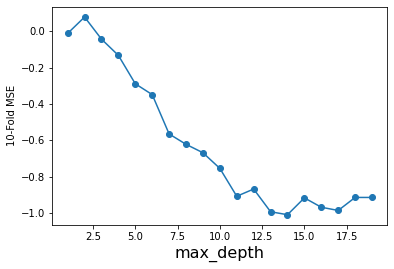

In [76]:
from sklearn.tree import DecisionTreeRegressor


# Tu código aquí
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

## Random forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

best mean cross-validation score: 0.147
best parameters: {'max_depth': 4}


In [78]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.43220364227107366
Test:  0.11004239925620674


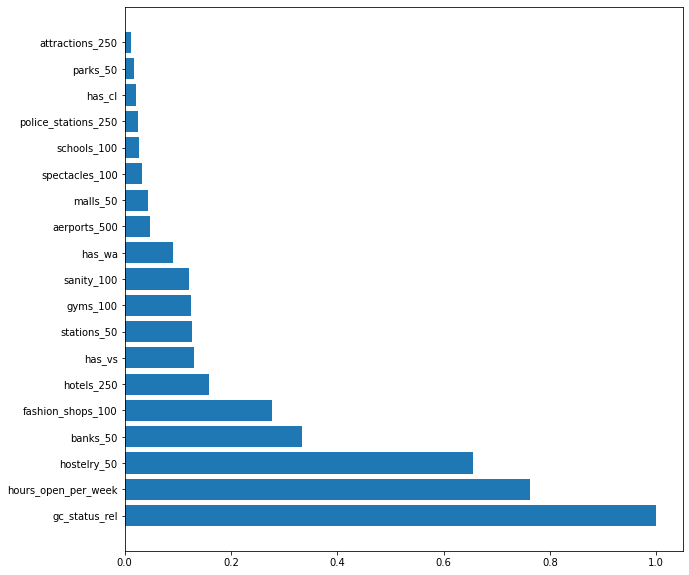

In [79]:
 # Tu código aquí
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

##  Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

# Estos son parametros libres yo los utilizo asi ya que los he copiado pero bueno... entiendo que es para la práctica
Niterations = [100,125,250, 500,1000,1500,2000]
learningRate = [0.1,0.05, 0.01, 0.005]

param_gbr_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_gbr_grid, cv = 5)
gbr_grid.fit(X_train, y_train.ravel())
print("best mean cross-validation score: {:.3f}".format(gbr_grid.best_score_))
print("best parameters: {}".format(gbr_grid.best_params_))

best mean cross-validation score: 0.170
best parameters: {'learning_rate': 0.01, 'n_estimators': 125}


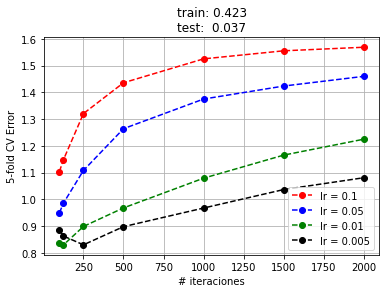

In [81]:
lrOptimo = gbr_grid.best_params_['learning_rate']
neOptimo = gbr_grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train.ravel())

error = 1-gbr_grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

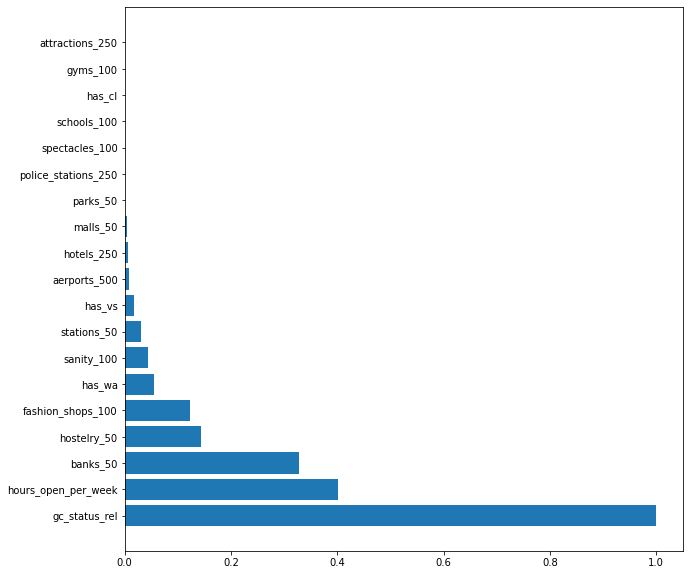

In [82]:
# Para este podemos ver las importancias de las variables
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [83]:
print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

Train:  0.42321155799837074
Test:  0.03697936704496452
